In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [50]:
df = pd.read_csv("/mnt/research/CMSE495-SS24-ICER/slurm_usage/DID_FINAL_SLURM_OCT_2023.csv",delimiter="|",nrows=100000)

In [51]:
df

,Unnamed: 0,Unnamed: 0.1,JobID,User,Group,Submit,Start,End,Elapsed,State,...,CPUTimeRAW,ReqCPUS,AllocCPUS,ReqMem,MaxRSS,ReqNodes,NNodes,NodeList,ReqTRES,AllocTRES
0,0,0,31496544,user_679,group_121,2023-03-21T11:13:45,Unknown,Unknown,00:00:00,PENDING,...,0,28,0,21000M,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN
1,1,1,31497932,user_679,group_121,2023-03-21T11:31:18,Unknown,Unknown,00:00:00,PENDING,...,0,28,0,21000M,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN
2,2,2,31993628,user_105,group_114,2023-03-22T18:19:12,Unknown,Unknown,00:00:00,PENDING,...,0,12,0,150G,NaN,1,1,None assigned,"billing=23347,cpu=12,gres/gpu=8,mem=150G,node=1",NaN
3,3,3,39087660,user_652,group_054,2023-04-04T13:09:10,Unknown,Unknown,00:00:00,PENDING,...,0,640,0,20G,NaN,10,10,None assigned,"billing=3112,cpu=640,mem=20G,node=10",NaN
4,4,4,59062820,user_188,group_046,2023-05-08T09:58:20,2024-01-01T00:58:57,2024-01-01T00:59:06,00:00:09,COMPLETED,...,360,40,40,8G,NaN,1,1,skl-029,"billing=1245,cpu=40,mem=8G,node=1","billing=1245,cpu=40,mem=8G,node=1"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,99995,91835736,user_258,group_010,2023-10-01T11:48:42,2023-10-01T11:48:42,2023-10-01T11:55:32,00:06:50,COMPLETED,...,410,1,1,NaN,1284116K,1,1,lac-324,NaN,"cpu=1,mem=2G,node=1"
99996,99996,99996,91835736,user_258,group_010,2023-10-01T11:48:42,2023-10-01T11:48:42,2023-10-01T11:55:35,00:06:53,COMPLETED,...,413,1,1,NaN,0,1,1,lac-324,NaN,"billing=311,cpu=1,mem=2G,node=1"
99997,99997,99997,91835740,user_454,group_154,2023-10-01T11:35:24,2023-10-01T11:48:42,2023-10-01T11:55:32,00:06:50,COMPLETED,...,410,1,1,2G,NaN,1,1,lac-324,"billing=311,cpu=1,mem=2G,node=1","billing=311,cpu=1,mem=2G,node=1"
99998,99998,99998,91835740,user_258,group_010,2023-10-01T11:48:42,2023-10-01T11:48:42,2023-10-01T11:55:32,00:06:50,COMPLETED,...,410,1,1,NaN,1283920K,1,1,lac-324,NaN,"cpu=1,mem=2G,node=1"


In [52]:
df["underutilizerCPUS"] = df['AllocCPUS'] - df['ReqCPUS']
df["underutilizerNodes"] = df['NNodes'] - df['ReqNodes']
df

,Unnamed: 0,Unnamed: 0.1,JobID,User,Group,Submit,Start,End,Elapsed,State,...,AllocCPUS,ReqMem,MaxRSS,ReqNodes,NNodes,NodeList,ReqTRES,AllocTRES,underutilizerCPUS,underutilizerNodes
0,0,0,31496544,user_679,group_121,2023-03-21T11:13:45,Unknown,Unknown,00:00:00,PENDING,...,0,21000M,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN,-28,0
1,1,1,31497932,user_679,group_121,2023-03-21T11:31:18,Unknown,Unknown,00:00:00,PENDING,...,0,21000M,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN,-28,0
2,2,2,31993628,user_105,group_114,2023-03-22T18:19:12,Unknown,Unknown,00:00:00,PENDING,...,0,150G,NaN,1,1,None assigned,"billing=23347,cpu=12,gres/gpu=8,mem=150G,node=1",NaN,-12,0
3,3,3,39087660,user_652,group_054,2023-04-04T13:09:10,Unknown,Unknown,00:00:00,PENDING,...,0,20G,NaN,10,10,None assigned,"billing=3112,cpu=640,mem=20G,node=10",NaN,-640,0
4,4,4,59062820,user_188,group_046,2023-05-08T09:58:20,2024-01-01T00:58:57,2024-01-01T00:59:06,00:00:09,COMPLETED,...,40,8G,NaN,1,1,skl-029,"billing=1245,cpu=40,mem=8G,node=1","billing=1245,cpu=40,mem=8G,node=1",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,99995,91835736,user_258,group_010,2023-10-01T11:48:42,2023-10-01T11:48:42,2023-10-01T11:55:32,00:06:50,COMPLETED,...,1,NaN,1284116K,1,1,lac-324,NaN,"cpu=1,mem=2G,node=1",0,0
99996,99996,99996,91835736,user_258,group_010,2023-10-01T11:48:42,2023-10-01T11:48:42,2023-10-01T11:55:35,00:06:53,COMPLETED,...,1,NaN,0,1,1,lac-324,NaN,"billing=311,cpu=1,mem=2G,node=1",0,0
99997,99997,99997,91835740,user_454,group_154,2023-10-01T11:35:24,2023-10-01T11:48:42,2023-10-01T11:55:32,00:06:50,COMPLETED,...,1,2G,NaN,1,1,lac-324,"billing=311,cpu=1,mem=2G,node=1","billing=311,cpu=1,mem=2G,node=1",0,0
99998,99998,99998,91835740,user_258,group_010,2023-10-01T11:48:42,2023-10-01T11:48:42,2023-10-01T11:55:32,00:06:50,COMPLETED,...,1,NaN,1283920K,1,1,lac-324,NaN,"cpu=1,mem=2G,node=1",0,0


In [53]:
features=["underutilizerNodes",'underutilizerCPUS']

In [54]:
data_types=df.dtypes
data_types

Unnamed: 0             int64
Unnamed: 0.1           int64
JobID                  int64
User                  object
Group                 object
Submit                object
Start                 object
End                   object
Elapsed               object
State                 object
Account               object
AssocID               object
Partition             object
Timelimit             object
UserCPU               object
SystemCPU             object
TotalCPU              object
CPUTime               object
CPUTimeRAW             int64
ReqCPUS                int64
AllocCPUS              int64
ReqMem                object
MaxRSS                object
ReqNodes               int64
NNodes                 int64
NodeList              object
ReqTRES               object
AllocTRES             object
underutilizerCPUS      int64
underutilizerNodes     int64
dtype: object

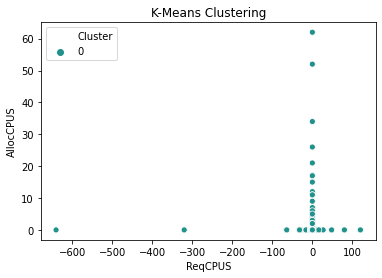

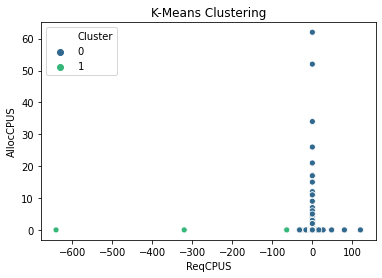

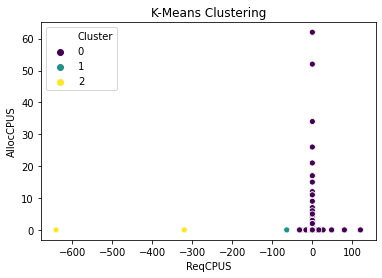

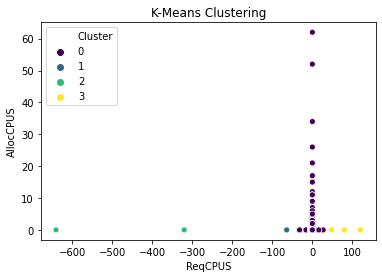

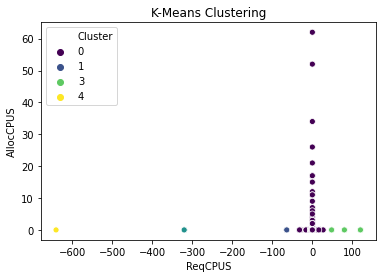

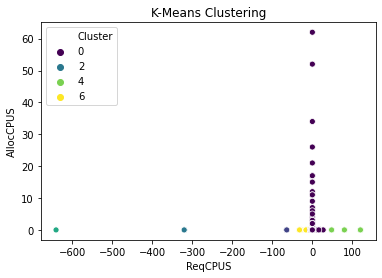

In [56]:
for i in range(1,7):
    k=i
    X=df[features]
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    df['Cluster'] = labels
    sns.scatterplot(x='underutilizerCPUS', y='underutilizerNodes', hue='Cluster', data=df, palette='viridis')
    plt.title('K-Means Clustering')
    plt.xlabel('ReqCPUS')
    plt.ylabel('AllocCPUS')
    plt.show()
    
    

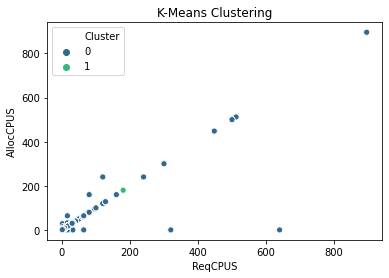

In [35]:
k=2
X=df[features]
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
labels = kmeans.labels_
df['Cluster'] = labels
sns.scatterplot(x='ReqCPUS', y='AllocCPUS', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('ReqCPUS')
plt.ylabel('AllocCPUS')
plt.show()

In [39]:
df["underutilizer"] = df['ReqCPUS'] - df['AllocCPUS']
df

,Unnamed: 0,Unnamed: 0.1,JobID,User,Group,Submit,Start,End,Elapsed,State,...,AllocCPUS,ReqMem,MaxRSS,ReqNodes,NNodes,NodeList,ReqTRES,AllocTRES,Cluster,underutilizer
0,0,0,31496544,user_679,group_121,2023-03-21T11:13:45,Unknown,Unknown,00:00:00,PENDING,...,0,21000M,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN,0,28
1,1,1,31497932,user_679,group_121,2023-03-21T11:31:18,Unknown,Unknown,00:00:00,PENDING,...,0,21000M,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN,0,28
2,2,2,31993628,user_105,group_114,2023-03-22T18:19:12,Unknown,Unknown,00:00:00,PENDING,...,0,150G,NaN,1,1,None assigned,"billing=23347,cpu=12,gres/gpu=8,mem=150G,node=1",NaN,0,12
3,3,3,39087660,user_652,group_054,2023-04-04T13:09:10,Unknown,Unknown,00:00:00,PENDING,...,0,20G,NaN,10,10,None assigned,"billing=3112,cpu=640,mem=20G,node=10",NaN,0,640
4,4,4,59062820,user_188,group_046,2023-05-08T09:58:20,2024-01-01T00:58:57,2024-01-01T00:59:06,00:00:09,COMPLETED,...,40,8G,NaN,1,1,skl-029,"billing=1245,cpu=40,mem=8G,node=1","billing=1245,cpu=40,mem=8G,node=1",0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,99995,91835736,user_258,group_010,2023-10-01T11:48:42,2023-10-01T11:48:42,2023-10-01T11:55:32,00:06:50,COMPLETED,...,1,NaN,1284116K,1,1,lac-324,NaN,"cpu=1,mem=2G,node=1",0,0
99996,99996,99996,91835736,user_258,group_010,2023-10-01T11:48:42,2023-10-01T11:48:42,2023-10-01T11:55:35,00:06:53,COMPLETED,...,1,NaN,0,1,1,lac-324,NaN,"billing=311,cpu=1,mem=2G,node=1",0,0
99997,99997,99997,91835740,user_454,group_154,2023-10-01T11:35:24,2023-10-01T11:48:42,2023-10-01T11:55:32,00:06:50,COMPLETED,...,1,2G,NaN,1,1,lac-324,"billing=311,cpu=1,mem=2G,node=1","billing=311,cpu=1,mem=2G,node=1",0,0
99998,99998,99998,91835740,user_258,group_010,2023-10-01T11:48:42,2023-10-01T11:48:42,2023-10-01T11:55:32,00:06:50,COMPLETED,...,1,NaN,1283920K,1,1,lac-324,NaN,"cpu=1,mem=2G,node=1",0,0


In [47]:
df_sorted = df.sort_values(by='underutilizerNodes', ascending=False)
df_sorted

,Unnamed: 0,Unnamed: 0.1,JobID,User,Group,Submit,Start,End,Elapsed,State,...,MaxRSS,ReqNodes,NNodes,NodeList,ReqTRES,AllocTRES,Cluster,underutilizer,underutilizerCPUS,underutilizerNodes
0,0,0,31496544,user_679,group_121,2023-03-21T11:13:45,Unknown,Unknown,00:00:00,PENDING,...,NaN,1,1,None assigned,"billing=3192,cpu=28,gres/gpu=4,mem=21000M,node=1",NaN,0,28,28,0
66650,66650,66650,91792916,user_258,group_010,2023-10-01T08:02:40,2023-10-01T08:02:40,2023-10-01T08:52:27,00:49:47,FAILED,...,167660K,1,1,lac-218,NaN,"cpu=1,mem=5G,node=1",0,0,0,0
66672,66672,66672,91792916,user_258,group_010,2023-10-01T08:02:40,2023-10-01T08:02:40,2023-10-01T08:52:31,00:49:51,OUT_OF_MEMORY,...,0,1,1,lac-218,NaN,"billing=778,cpu=1,mem=5G,node=1",0,0,0,0
66671,66671,66671,91792916,user_258,group_010,2023-10-01T08:02:40,2023-10-01T08:02:40,2023-10-01T08:52:27,00:49:47,OUT_OF_MEMORY,...,5205580K,1,1,lac-218,NaN,"cpu=1,mem=5G,node=1",0,0,0,0
66670,66670,66670,91792916,user_316,group_009,2023-10-01T08:02:20,2023-10-01T08:02:40,2023-10-01T08:52:27,00:49:47,OUT_OF_MEMORY,...,NaN,1,1,lac-218,"billing=778,cpu=1,mem=5G,node=1","billing=778,cpu=1,mem=5G,node=1",0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44039,44039,44039,91762092,user_247,group_096,2023-10-01T02:18:10,2023-10-01T04:17:48,2023-10-01T04:39:40,00:21:52,COMPLETED,...,NaN,1,22,"acm-[018,023-024,038,047],amr-[184,193,196-197...","billing=389120,cpu=500,mem=2500G,node=1","billing=389120,cpu=500,mem=2500G,node=22",0,0,0,-21
8157,8157,8157,91634412,user_002,group_148,2023-09-30T13:54:06,2023-09-30T13:54:18,2023-10-05T17:18:00,5-03:23:42,CANCELLED by 2236,...,NaN,1,27,"acm-[012-013,019-027,032,035-047],amr-[234-235]","billing=560332,cpu=120,mem=3600G,node=1","billing=560332,cpu=120,mem=3600G,node=27",1,0,0,-26
8149,8149,8149,91634404,user_002,group_148,2023-09-30T13:53:48,2023-09-30T13:53:52,2023-10-05T17:18:09,5-03:24:17,CANCELLED by 2236,...,NaN,1,35,"amr-[097-101,184,187-190,193-196,198-199,203,2...","billing=560332,cpu=120,mem=3600G,node=1","billing=560332,cpu=120,mem=3600G,node=35",1,0,0,-34
8161,8161,8161,91634416,user_002,group_148,2023-09-30T13:54:20,2023-09-30T13:57:16,2023-10-02T04:59:49,1-15:02:33,COMPLETED,...,NaN,1,53,"lac-[041,217,225,231-232,235,240,243-246,248,2...","billing=560332,cpu=120,mem=3600G,node=1","billing=560332,cpu=120,mem=3600G,node=53",0,0,0,-52


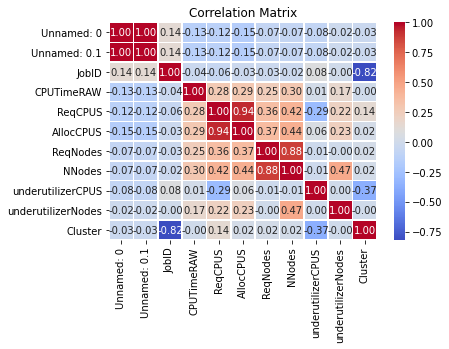

In [57]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()